In [1]:
%pylab inline
import mentari_default as mtr
import h5py
import os
from astropy.cosmology import FlatLambdaCDM

Populating the interactive namespace from numpy and matplotlib


In [23]:
#This example is to read over files on one redshift only, you can loop over z_list if necessary
Ks = []
W1 = []
IRAC = []
mass = []
m_abs = [Ks, W1, IRAC]
#m_abs_s = []
filter_list = ['TwoMass_Ks', 'WISE_W1', 'IRAC_1']

dirname = 'output_app/'
filename = 'mag_NIR_0.0'
#z_list = [0.564, 0.755]
z_list = [0.00]
ext = '.hdf5'
firstfile = 0
lastfile = 1

'''
for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        m2 = f['SUNRISE']
        m3 = f['Somerville']
        m4 = f['CF00']
        for j in range(len(filter_list)):
            m[j][0].extend(m1[j])
            m[j][1].extend(m2[j])
            m[j][2].extend(m3[j])
            m[j][3].extend(m4[j])
'''
for i in range(firstfile, lastfile+1):
    file = dirname + filename + '_' + str(i) + ext

    with h5py.File(file, 'r') as f:
        stellarmass = f['stellarmass']
        mass.extend(stellarmass)
        #m1 = f['apparent']
        m2 = f['absolut']
        print(len(m2))
        #m3 = f['absolut_stellar']
        
        for j in range(len(filter_list)):
            #m_app.extend(m1[j])
            m_abs[j].extend(m2[j])
            #m_abs_s.extend(m3[j])


3
3


### Example on reading output file from mentari

In [50]:
#This example is to read over files on one redshift only, you can loop over z_list if necessary
Ks = []
W1 = []
IRAC = []
mass = []
m_abs = [Ks, W1, IRAC]
#m_abs_s = []
filter_list = ['TwoMass_Ks', 'WISE_W1', 'IRAC_1']

dirname = 'output_app/'
filename = 'mag_NIR_0.0'
#z_list = [0.564, 0.755]
z_list = [0.00]
ext = '.hdf5'
firstfile = 0
lastfile = 1

'''
for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        m2 = f['SUNRISE']
        m3 = f['Somerville']
        m4 = f['CF00']
        for j in range(len(filter_list)):
            m[j][0].extend(m1[j])
            m[j][1].extend(m2[j])
            m[j][2].extend(m3[j])
            m[j][3].extend(m4[j])
'''
for i in range(firstfile, lastfile+1):
    file = dirname + filename + '_' + str(i) + ext

    with h5py.File(file, 'r') as f:
        stellarmass = f['stellarmass']
        mass.extend(stellarmass)
        #m1 = f['apparent']
        m2 = f['absolut']
        print(len(m2))
        #m3 = f['absolut_stellar']
        
        for j in range(len(filter_list)):
            #m_app.extend(m1[j])
            m_abs[j].extend(m2[j])
            #m_abs_s.extend(m3[j])


3
3


In [30]:
GALEX_FUV_m1 = []
GALEX_FUV_m2 = []
GALEX_FUV_m3 = []
GALEX_FUV_m4 = []
GALEX_FUV_u = []

GALEX_NUV_m1 = []
GALEX_NUV_m2 = []
GALEX_NUV_m3 = []
GALEX_NUV_m4 = []
GALEX_NUV_u = []

IRAC_1_m1 = []
IRAC_1_m2 = []
IRAC_1_m3 = []
IRAC_1_m4 = []
IRAC_1_u = []

IRAC_2_m1 = []
IRAC_2_m2 = []
IRAC_2_m3 = []
IRAC_2_m4 = []
IRAC_2_u = []

IRAC_3_m1 = []
IRAC_3_m2 = []
IRAC_3_m3 = []
IRAC_3_m4 = []
IRAC_3_u = []

IRAC_4_m1 = []
IRAC_4_m2 = []
IRAC_4_m3 = []
IRAC_4_m4 = []
IRAC_4_u = []

MIPS_24um_m1 = []
MIPS_24um_m2 = []
MIPS_24um_m3 = []
MIPS_24um_m4 = []
MIPS_24um_u = []

PACS_160um_m1 = []
PACS_160um_m2 = []
PACS_160um_m3 = []
PACS_160um_m4 = []
PACS_160um_u = []

PACS_70um_m1 = []
PACS_70um_m2 = []
PACS_70um_m3 = []
PACS_70um_m4 = []
PACS_70um_u = []

SCUBA_850WB_m1 = []
SCUBA_850WB_m2 = []
SCUBA_850WB_m3 = []
SCUBA_850WB_m4 = []
SCUBA_850WB_u = []

SPIRE_250um_m1 = []
SPIRE_250um_m2 = []
SPIRE_250um_m3 = []
SPIRE_250um_m4 = []
SPIRE_250um_u = []

SPIRE_350um_m1 = []
SPIRE_350um_m2 = []
SPIRE_350um_m3 = []
SPIRE_350um_m4 = []
SPIRE_350um_u = []

SPIRE_500um_m1 = []
SPIRE_500um_m2 = []
SPIRE_500um_m3 = []
SPIRE_500um_m4 = []
SPIRE_500um_u = []

Sdss_g_m1 = []
Sdss_g_m2 = []
Sdss_g_m3 = []
Sdss_g_m4 = []
Sdss_g_u = []

Sdss_i_m1 = []
Sdss_i_m2 = []
Sdss_i_m3 = []
Sdss_i_m4 = []
Sdss_i_u = []

Sdss_r_m1 = []
Sdss_r_m2 = []
Sdss_r_m3 = []
Sdss_r_m4 = []
Sdss_r_u = []

Sdss_u_m1 = []
Sdss_u_m2 = []
Sdss_u_m3 = []
Sdss_u_m4 = []
Sdss_u_u = []

Sdss_z_m1 = []
Sdss_z_m2 = []
Sdss_z_m3 = []
Sdss_z_m4 = []
Sdss_z_u = []

TwoMass_Ks_m1 = []
TwoMass_Ks_m2 = []
TwoMass_Ks_m3 = []
TwoMass_Ks_m4 = []
TwoMass_Ks_u = []

W1_m1 = []
W1_m2 = []
W1_m3 = []
W1_m4 = []
W1_u = []

VIRCAM_K_m1 = []
VIRCAM_K_m2 = []
VIRCAM_K_m3 = []
VIRCAM_K_m4 = []
VIRCAM_K_u = []

m = [[GALEX_FUV_m1, GALEX_FUV_m2, GALEX_FUV_m3, GALEX_FUV_m4, GALEX_FUV_u],
    [GALEX_NUV_m1, GALEX_NUV_m2, GALEX_NUV_m3, GALEX_NUV_m4, GALEX_NUV_u],
    [TwoMass_Ks_m1, TwoMass_Ks_m2, TwoMass_Ks_m3, TwoMass_Ks_m4, TwoMass_Ks_u],
    [W1_m1, W1_m2, W1_m3, W1_m4, W1_u],
    [VIRCAM_K_m1, VIRCAM_K_m2, VIRCAM_K_m3, VIRCAM_K_m4, VIRCAM_K_u],
    [Sdss_u_m1, Sdss_u_m2, Sdss_u_m3, Sdss_u_m4, Sdss_u_u],
    [Sdss_g_m1, Sdss_g_m2, Sdss_g_m3, Sdss_g_m4, Sdss_g_u],
    [Sdss_r_m1, Sdss_r_m2, Sdss_r_m3, Sdss_r_m4, Sdss_r_u],
    [Sdss_i_m1, Sdss_i_m2, Sdss_i_m3, Sdss_i_m4, Sdss_i_u],
    [Sdss_z_m1, Sdss_z_m2, Sdss_z_m3, Sdss_z_m4, Sdss_z_u],
    [IRAC_1_m1, IRAC_1_m2, IRAC_1_m3, IRAC_1_m4, IRAC_1_u],
    [IRAC_2_m1, IRAC_2_m2, IRAC_2_m3, IRAC_2_m4, IRAC_2_u],
    [IRAC_3_m1, IRAC_3_m2, IRAC_3_m3, IRAC_3_m4, IRAC_3_u],
    [IRAC_4_m1, IRAC_4_m2, IRAC_4_m3, IRAC_4_m4, IRAC_4_u],
    [MIPS_24um_m1, MIPS_24um_m2, MIPS_24um_m3, MIPS_24um_m4, MIPS_24um_u],
    [PACS_70um_m1, PACS_70um_m2, PACS_70um_m3, PACS_70um_m4, PACS_70um_u],
    [PACS_160um_m1, PACS_160um_m2, PACS_160um_m3, PACS_160um_m4, PACS_160um_u],
    [SPIRE_250um_m1, SPIRE_250um_m2, SPIRE_250um_m3, SPIRE_250um_m4, SPIRE_250um_u],
    [SPIRE_350um_m1, SPIRE_350um_m2, SPIRE_350um_m3, SPIRE_350um_m4, SPIRE_350um_u],
    [SPIRE_500um_m1, SPIRE_500um_m2, SPIRE_500um_m3, SPIRE_500um_m4, SPIRE_500um_u],
    [SCUBA_850WB_m1, SCUBA_850WB_m2, SCUBA_850WB_m3, SCUBA_850WB_m4, SCUBA_850WB_u]]

filter_list = ['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'WISE_W1', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB']

#filter_list = ['GALEX_FUV', 'TwoMass_Ks', 'VIRCAM_K','IRAC_4','SPIRE_250um']

dirname = 'test-alloutput/'
filename = 'mag_z0.0_'
ext = '.hdf5'
firstfile = 0
lastfile = 1

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        m2 = f['SUNRISE']
        m3 = f['Somerville']
        m4 = f['CF00']
        mu = f['unattenuated']
        for j in range(len(filter_list)):
            m[j][0].extend(m1[j])
            m[j][1].extend(m2[j])
            m[j][2].extend(m3[j])
            m[j][3].extend(m4[j])
            m[j][4].extend(mu[j])
        

test-alloutput/mag_z0.0_0.hdf5
test-alloutput/mag_z0.0_1.hdf5


In [33]:
GALEX_FUV_m1 = []
GALEX_FUV_u = []

GALEX_NUV_m1 = []
GALEX_NUV_u = []

IRAC_1_m1 = []
IRAC_1_u = []

IRAC_2_m1 = []
IRAC_2_u = []

IRAC_3_m1 = []
IRAC_3_u = []

IRAC_4_m1 = []
IRAC_4_u = []

MIPS_24um_m1 = []
MIPS_24um_u = []

PACS_160um_m1 = []
PACS_160um_u = []

PACS_70um_m1 = []
PACS_70um_u = []

SCUBA_850WB_m1 = []
SCUBA_850WB_u = []

SPIRE_250um_m1 = []
SPIRE_250um_u = []

SPIRE_350um_m1 = []
SPIRE_350um_u = []

SPIRE_500um_m1 = []
SPIRE_500um_u = []

Sdss_g_m1 = []
Sdss_g_u = []

Sdss_i_m1 = []
Sdss_i_u = []

Sdss_r_m1 = []
Sdss_r_u = []

Sdss_u_m1 = []
Sdss_u_u = []

Sdss_z_m1 = []
Sdss_z_u = []

TwoMass_Ks_m1 = []
TwoMass_Ks_u = []

W1_m1 = []
W1_u = []

VIRCAM_K_m1 = []
VIRCAM_K_u = []

mb = [[GALEX_FUV_m1, GALEX_FUV_u],
    [GALEX_NUV_m1, GALEX_NUV_u],
    [TwoMass_Ks_m1, TwoMass_Ks_u],
    [W1_m1, W1_u],
    [VIRCAM_K_m1, VIRCAM_K_u],
    [Sdss_u_m1, Sdss_u_u],
    [Sdss_g_m1, Sdss_g_u],
    [Sdss_r_m1, Sdss_r_u],
    [Sdss_i_m1, Sdss_i_u],
    [Sdss_z_m1, Sdss_z_u],
    [IRAC_1_m1, IRAC_1_u],
    [IRAC_2_m1, IRAC_2_u],
    [IRAC_3_m1, IRAC_3_u],
    [IRAC_4_m1, IRAC_4_u],
    [MIPS_24um_m1, MIPS_24um_u],
    [PACS_70um_m1, PACS_70um_u],
    [PACS_160um_m1, PACS_160um_u],
    [SPIRE_250um_m1, SPIRE_250um_u],
    [SPIRE_350um_m1, SPIRE_350um_u],
    [SPIRE_500um_m1, SPIRE_500um_u],
    [SCUBA_850WB_m1, SCUBA_850WB_u]]

filter_list = ['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'WISE_W1', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB']

dirname = 'output-test/'
filename = 'mag_z0.0_'
ext = '.hdf5'
firstfile = 0
lastfile = 1

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        mu = f['unattenuated']
        for j in range(len(filter_list)):
            mb[j][0].extend(m1[j])
            mb[j][1].extend(mu[j])
        

output-test/mag_z0.0_0.hdf5
output-test/mag_z0.0_1.hdf5


### Plotting stellar mass function and luminosity function

In [25]:
Hubble_h=0.73
#BoxSize = ((500**3) * 32/512)**(1/3) #32 files ~ 200Mpc
#print(BoxSize)
BoxSize = ((62.5**3) * 2/8)**(1/3)
volume = (BoxSize/Hubble_h)**3
#vol = (200*0.73/0.7)**3
#vol2 = (BoxSize/0.7)**3


In [ ]:
#Luminosity function using apparent magnitude at z=0.5
mi = min(m_app)
ma = -14
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_app, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

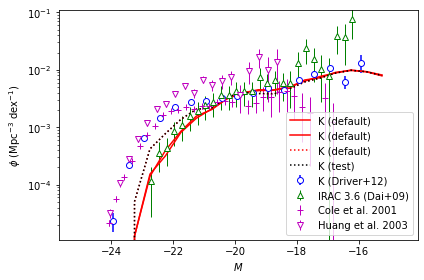

In [35]:
#Luminosity function using absolute magnitude at z=0.5
mi = -30
ma = -15
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

plt.figure(figsize=(6,4))
'''
Mstar = -21.67 
alpha = -1.05
phistar = 0.0058
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, '-', lw=1.0, label='W1 2.4$\mu$m (Lake+17)')

Mstar = -21.67 - 5 * np.log10(0.7) 
alpha = -1.05
phistar = 0.0058
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, '-', lw=1.0, label='W1 if M-5logh (Lake+17)')
'''
k_x, k_y, k_err, k_N = np.loadtxt('data_obs/LFk_driver_12.txt', unpack=True)
plt.errorbar(k_x+5.0*np.log10(Hubble_h), k_y*2*Hubble_h*Hubble_h*Hubble_h, k_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='b', mfc='white', ls = 'none', label='K (Driver+12)')

band, mag, phi, e_phi = np.loadtxt('data_obs/LFirac_dai_09.txt', usecols=(0,1,2,3), unpack=True)

w = np.where(band == 3.6)[0]
mag_36 = mag[w]
phi_36 = phi[w]
ephi_36 = e_phi[w]
vegacorr = [2.79, 3.26, 3.73, 4.40] #From Gillian Wilson webpage
plt.errorbar(mag_36+vegacorr[0], phi_36*Hubble_h*Hubble_h*Hubble_h, ephi_36*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='^', color='g', mfc='white', ls='none',label='IRAC 3.6 (Dai+09)')

counts, binedges = np.histogram(m_abs[0], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'r-', lw=1.5, label='K (default)')

    
counts, binedges = np.histogram(m[2][0], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'r-', lw=1.5, label='K (default)')

counts, binedges = np.histogram(m[2][4], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5, label='K (default)')

counts, binedges = np.histogram(mb[2][1], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k:', lw=1.5, label='K (test)')
'''
counts, binedges = np.histogram(m[3][0], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5, label='W1 (default)')

counts, binedges = np.histogram(m[10][0], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'm--', lw=1.5, label='IRAC 3.6 (default)')

counts, binedges = np.histogram(m[3][4], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1, label='W1 (unattenuated)')
'''

# Cole et al. 2001 K band 2dFGRS LF
Cole_Phi = np.array([3.1315561E-03, 8.2625253E-03, 0.0000000E+00, 4.6483092E-03, 5.7576019E-03, 9.1649834E-03, 1.1232893E-02,
            1.0536440E-02, 8.5763102E-03, 8.8181989E-03, 6.9448259E-03, 6.0896124E-03, 9.2596142E-03, 6.9631678E-03,
            7.2867479E-03, 6.9923755E-03, 5.9844730E-03, 5.9305103E-03, 5.3865365E-03, 5.8525647E-03, 5.2373926E-03,
            4.9635037E-03, 4.1801766E-03, 2.7171015E-03, 1.8800517E-03, 1.2136410E-03, 6.5419916E-04, 3.4594961E-04,
            1.4771589E-04, 5.5521199E-05, 2.1283222E-05, 9.4211919E-06, 1.0871951E-06, 2.7923562E-07])
Cole_PhiErr = np.array([3.6377162E-03, 6.6833422E-03, 1.0000000E-10, 4.0996978E-03, 4.3155681E-03, 5.6722397E-03, 6.4211683E-03,
            5.7120644E-03, 4.6346937E-03, 3.8633577E-03, 2.4383855E-03, 1.6279118E-03, 1.6941463E-03, 1.1781409E-03,
            9.7785855E-04, 7.9027453E-04, 6.0649612E-04, 5.1598746E-04, 4.2267537E-04, 3.7395130E-04, 2.8177485E-04,
            2.1805518E-04, 1.6829016E-04, 1.1366483E-04, 8.1871600E-05, 5.7472309E-05, 3.6554517E-05, 2.3141622E-05,
            1.2801432E-05, 6.5092854E-06, 3.3540452E-06, 1.9559407E-06, 5.6035748E-07, 2.8150106E-07])
Cole_Mag = np.array([-18.00000, -18.25000, -18.50000, -18.75000, -19.00000, -19.25000, -19.50000, -19.75000, -20.00000,
            -20.25000, -20.50000, -20.75000, -21.00000, -21.25000, -21.50000, -21.75000, -22.00000, -22.25000,
            -22.50000, -22.75000, -23.00000, -23.25000, -23.50000, -23.75000, -24.00000, -24.25000, -24.50000,
            -24.75000, -25.00000, -25.25000, -25.50000, -25.75000, -26.00000, -26.25000])

# Huang et al. 2003 K band Hawaii+AAO LF
Huang_Phi = np.array([0.0347093, 0.0252148, 0.0437980, 0.0250516, 0.00939655, 0.0193473, 0.0162743, 0.0142267, 0.0174460,
            0.0100971, 0.0136507, 0.00994688, 0.00655286, 0.00528234, 0.00310017, 0.00157789, 0.000721131,
            0.000272634, 8.33409e-05, 2.12150e-05, 3.97432e-06, 5.07697e-06, 5.42939e-07])
Huang_PhiErr = np.array([ 0.0249755, 0.0181685, 0.0161526, 0.0105895, 0.00479689, 0.00525068, 0.00428192, 0.00308970, 0.00248676,
            0.00166458, 0.00166691, 0.00106289, 0.000704721, 0.000527429, 0.000340814, 0.000170548, 8.25681e-05,
            3.81529e-05, 1.50279e-05, 6.16614e-06, 2.34362e-06, 1.98971e-06, 5.54946e-07])
Huang_Mag = np.array([-19.8000, -20.1000, -20.4000, -20.7000, -21.0000, -21.3000, -21.6000, -21.9000, -22.2000, -22.5000,
            -22.8000, -23.1000, -23.4000, -23.7000, -24.0000, -24.3000, -24.6000, -24.9000, -25.2000,
            -25.5000, -25.8000, -26.1000, -26.4000])

# Finally plot the observational data
Cole_xval = Cole_Mag+1.85  #convert to AB mag
Huang_xval = Huang_Mag+1.85  #convert to AB mag
plt.errorbar(Cole_xval+5.0*np.log10(Hubble_h), Cole_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Cole_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='+', color='m', mfc='white', ls='none', label='Cole et al. 2001')
plt.errorbar(Huang_xval+5.0*np.log10(Hubble_h), Huang_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Huang_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='v', color='m', mfc='white', ls='none', label='Huang et al. 2003')

plt.legend()
plt.xlim([-25.7, -14.1])
plt.ylim([1.1e-5, 1.1e-1])

plt.yscale('log')

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$M$')
plt.tight_layout()
#plt.savefig('LF_mentari.png')


In [4]:
def comoving_volume_element(z, cosmo_params, small_h):
    cosmo = FlatLambdaCDM(H0=100.*small_h,Om0=cosmo_params[0])
    D_H = 2997.92458/small_h
    D_C = cosmo.comoving_distance(z).value
    return D_H * D_C**2 * cosmo.inv_efunc(z)

def schechter_numint_part1( z_edge, cosmo_params, small_h, nzsteps, survey_area, kcorr_coef=0 ):
    # define bin limits
    dz = np.diff( z_edge )
    zsub = np.arange( 0.5/nzsteps, 1, 1./nzsteps )
    # set up sub/grids; each has shape (zbins.size-1, nzsubsteps)
    zgrid = z_edge[:-1, np.newaxis] + zsub[np.newaxis, :] * dz[:, np.newaxis]
    zgrid = zgrid[ :, np.newaxis, :, np.newaxis ]
    # volume 
    dvolume = comoving_volume_element(zgrid, cosmo_params, small_h)
    dvolume *= dz.reshape((-1,1,1,1)) /nzsteps
    dvolume *= survey_area
    return dvolume

In [18]:
def luminosity_distance(z, h0=73., omega_m=0.27, omega_l=0.73):
    
    '''
    Computing luminosity distance
    Input:  - z (float) -- redshift
            - h0 (float) (optional) -- hubble constant (in km/pc)
            - omega_m (float) (optional) -- matter density parameter
            - omega_l (float) (optional) -- dark energy density parameter
            
    Output: - luminosity distance (float) -- in parsec
    '''
    import scipy.integrate
    c = 2.9979e18 #velocity of lights
    omega_k = 1. - omega_m - omega_l
    dh = c/1.e13/h0 * 1.e6 #in pc
    
    dc, edc = scipy.integrate.quad(lambda x: (omega_m * (1.+x)** 3 + omega_k * (1+x)**2 + omega_l)**(-.5), 0., z, epsrel=1e-4)
    dc = dh * dc
    
    if omega_k > 0.:
    	dm = dh * np.sinh(dc/dh * np.sqrt(omega_k)) / np.sqrt(omega_k)
    elif omega_k < 0.:
    	dm = dh * np.sin(dc/dh * np.sqrt(-omega_k)) / np.sqrt(-omega_k)
    else:
    	dm = dc
    return dm * (1+z)

Text(0, 0.5, '$\\phi (\\mathrm{Mpc}^{-3} \\mathrm{dex}^{-1})$')

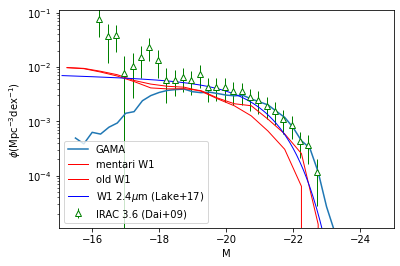

In [39]:
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
mi = -30
ma = -15
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

cosmo_params = [0.3, 0.7, 0]
small_h = 0.7
#cosmo_params = [0.27, 0.73, 0]
#small_h = 0.73
hubbledist = 2997.92458/small_h #Mpc
cosmo = FlatLambdaCDM(H0=100.*small_h,Om0=cosmo_params[0])

G12_survey_area = 60.*(np.pi/180)**2.
dvolume = schechter_numint_part1( np.array([0,0.1]), cosmo_params, small_h, 50, G12_survey_area )
dvolume = np.nansum( dvolume, axis=(2,3) )[0]
 
GAMA = np.loadtxt('data_obs/GAMA_G12.csv', skiprows=1, delimiter=',')
nQ = GAMA[:,5]
z = GAMA[:,4]
idx = np.where((nQ>2) & (z>0) & (z<0.1))[0]
GAMA_mass = GAMA[idx,6]
GAMA_W1 = GAMA[idx,2]
GAMA_z = z[idx]
dist = cosmo.luminosity_distance(GAMA_z).to(u.pc)
W1_abs = GAMA_W1 + 5 - (5*np.log10(dist.value)) + 0.58

W1_bins = np.arange(-24,-15,0.25) #log mass bins
G_hist = np.histogram(W1_abs,bins=W1_bins)
G12_survey_area = 60.*(np.pi/180)**2.
dvolume = schechter_numint_part1( np.array([0,0.1]), cosmo_params, small_h, 50, G12_survey_area )
dvolume = np.nansum( dvolume, axis=(2,3) )[0]
 
plt.plot(G_hist[1][:-1], G_hist[0]/dvolume/np.diff(G_hist[1]), label='GAMA' )

counts, binedges = np.histogram(m[3][0], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
#plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5, label='W1 (default)')

counts, binedges = np.histogram(m[3][4], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'r-', lw=1, label='mentari W1')

counts, binedges = np.histogram(mb[3][1], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
#plt.plot(xaxeshisto, counts/ volume / binwidth, 'g-', lw=1, label='mentari W1')

counts, binedges = np.histogram(m_abs[1], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'r-', lw=1, label='old W1')

k_x, k_y, k_err, k_N = np.loadtxt('data_obs/LFk_driver_12.txt', unpack=True)
#plt.errorbar(k_x+5.0*np.log10(Hubble_h), k_y*2*Hubble_h*Hubble_h*Hubble_h, k_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='b', mfc='white', ls = 'none', label='K (Driver+12)')

mi = -30
ma = -15
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

Mstar = -21.67  - 5 * np.log10(0.7)
alpha = -1.05
phistar = 0.0058
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, 'b-', lw=1.0, label='W1 2.4$\mu$m (Lake+17)')

band, mag, phi, e_phi = np.loadtxt('data_obs/LFirac_dai_09.txt', usecols=(0,1,2,3), unpack=True)

w = np.where(band == 3.6)[0]
mag_36 = mag[w]
phi_36 = phi[w]
ephi_36 = e_phi[w]
vegacorr = [2.79, 3.26, 3.73, 4.40] #From Gillian Wilson webpage
plt.errorbar(mag_36+vegacorr[0], phi_36*Hubble_h*Hubble_h*Hubble_h, ephi_36*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='^', color='g', mfc='white', ls='none',label='IRAC 3.6 (Dai+09)')

plt.yscale('log')
plt.legend()
plt.xlim(-15, -25)
plt.ylim([1.1e-5, 1.1e-1])
plt.xlabel('M')
plt.ylabel(r'$\phi (\mathrm{Mpc}^{-3} \mathrm{dex}^{-1})$')
#plt.savefig('new_W1.png')

[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9]


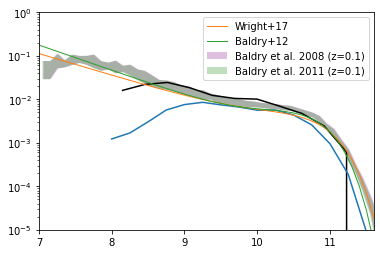

In [175]:
cosmo_params = [0.3, 0.7, 0]
small_h = 0.7
hubbledist = 2997.92458/small_h #Mpc
cosmo = FlatLambdaCDM(H0=100.*small_h,Om0=cosmo_params[0])
Hubble_h = 0.73

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

Baldry11 = np.array([
            [7.1, 17.9e-3, 5.7e-3],
            [7.3, 43.1e-3, 8.7e-3],
            [7.5, 31.6e-3, 9e-3],
            [7.7, 34.8e-3, 8.4e-3],
            [7.9, 27.3e-3, 4.2e-3],
            [8.1, 28.3e-3, 2.8e-3],
            [8.3, 23.5e-3, 3e-3],
            [8.5, 19.2e-3, 1.2e-3],
            [8.7, 18e-3, 2.6e-3],
            [8.9, 14.3e-3, 1.7e-3],
            [9.1, 10.2e-3, 0.6e-3],
            [9.3, 9.59e-3, 0.55e-3],
            [9.5, 7.42e-3, 0.41e-3],
            [9.7, 6.21e-3, 0.37e-3],
            [9.9, 5.71e-3, 0.35e-3],
            [10.1, 5.51e-3, 0.34e-3],
            [10.3, 5.48e-3, 0.34e-3],
            [10.5, 5.12e-3, 0.33e-3],
            [10.7, 3.55e-3, 0.27e-3],
            [10.9, 2.41e-3, 0.23e-3],
            [11.1, 1.27e-3, 0.16e-3],
            [11.3, 0.338e-3, 0.085e-3],
            [11.5, 0.042e-3, 0.03e-3],
            [11.7, 0.021e-3, 0.021e-3],
            [11.9, 0.042e-3, 0.03e-3]
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0])
#Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h**3
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2])* Hubble_h**3
plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='green', alpha=0.25, label='Baldry et al. 2011 (z=0.1)')


mi = 8
ma = 12
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

mass_plot = np.array(mass) * 0.73/0.7
mass_plot = np.log10(mass_plot)
counts, binedges = np.histogram(mass_plot, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)

GAMA = np.loadtxt('data_obs/GAMA_G12.csv', skiprows=1, delimiter=',')
nQ = GAMA[:,5]
z = GAMA[:,4]
idx = np.where((nQ>2) & (z>0) & (z<0.1))[0]
GAMA_mass = GAMA[idx,6]

mass_bins = np.arange(8,14,0.25) #log mass bins
G_hist = np.histogram(GAMA_mass,bins=mass_bins)

G12_survey_area = 60.*(np.pi/180)**2.
dvolume = schechter_numint_part1( np.array([0,0.1]), cosmo_params, small_h, 50, G12_survey_area )
dvolume = np.nansum( dvolume, axis=(2,3) )[0]
 
plt.plot(G_hist[1][:-1], G_hist[0]/dvolume/np.diff(G_hist[1]) )

mi = 5
ma = 12
M = np.arange(mi, ma, 0.1)
print(M)
Mstar = 10.78
alpha = -0.62
phistar = 2.93e-3
alpha_2 =-1.5
phistar_2 = 0.63e-3
xval = 10**(M - Mstar)
yval = np.log(10) * np.exp(-xval) * (phistar * xval**(alpha+1) + phistar_2 * xval**(alpha_2+1))
plt.plot(M, yval, '-', lw=1.0, label='Wright+17')

Mstar = 10.66
alpha = -0.46
phistar = 4.26e-3
alpha_2 =-1.58
phistar_2 = 0.58e-3
xval = 10**(M - Mstar)
yval = np.log(10) * np.exp(-xval) * (phistar * xval**(alpha+1) + phistar_2 * xval**(alpha_2+1))
plt.plot(M , yval, '-', lw=1.0, label='Baldry+12')

Mstar = 10.648
alpha = -0.35
phistar = 3.96e-3
alpha_2 =-1.47
phistar_2 = 0.79e-3
xval = 10 ** (M - Mstar)
yval = np.log(10) * np.exp(-xval) * (phistar * xval**(alpha+1) + phistar_2 * xval**(alpha_2+1))
#lt.plot(M, yval, '-', lw=1.0, label='Baldry+08')

Mstar = 10.745 
alpha = -0.466
phistar = 10**-2.437 
alpha_2 =-1.530
phistar_2 = 10**-3.201 
xval = 10 ** (M - Mstar)
yval = np.log(10) * np.exp(-xval) * (phistar * xval**(alpha+1) + phistar_2 * xval**(alpha_2+1))
#plt.plot(M, yval * 0.7, '-', lw=1.0, label='Driver+22')

plt.yscale('log')
plt.ylim(1e-5, 1)
plt.xlim(7,11.6)
plt.legend()

In [123]:
np.log(10)

2.302585092994046

In [ ]:
LF_BOSS,LF_SDSS,z_edge,mag_edge = np.load('data_obs/LFvalues.npy',allow_pickle=True)

In [ ]:
from astropy.cosmology import FlatLambdaCDM
cosmo_params = [0.3, 0.7, 0]
small_h = 0.7
cosmo = FlatLambdaCDM(H0=100.*small_h,Om0=cosmo_params[0])

In [ ]:

z_mid = z_edge[:-1]+np.diff(z_edge)
mag_mid = mag_edge[:-1]+np.diff(mag_edge)
#print(z_mid) 
plt.yscale('log')
for i in range(len(z_mid)):
    #print(i)
    dmval = cosmo.distmod(z_mid[i]).value - 5 * np.log10(1+z_mid[i])
    Abs_mag = mag_mid - dmval
    plt.scatter(Abs_mag, LF_BOSS[:,i], s=1)
    plt.scatter(Abs_mag, LF_SDSS[:,i], s=1)
#plt.show()


x = np.array([-17.87, -16.83, -15.57, -14.3, -13.13])
y = np.array([-3.1, -2.97, -2.83, -2.73, -2.59])
y_log = 10**(y) 
plt.plot(x, y_log, 'r-')


In [ ]:

z_mid = z_edge[:-1]+np.diff(z_edge)
mag_mid = mag_edge[:-1]+np.diff(mag_edge)
#print(z_mid) 
plt.yscale('log')
for i in range(len(z_mid)):
    Abs_mag = mag_mid - dmval
    plt.scatter(mag_mid, LF_BOSS[:,i], s=1)
    plt.scatter(mag_mid, LF_SDSS[:,i], s=1)
#plt.show()

mi = min(m_app)
ma = 21.5
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_app, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)

In [ ]:
W1 = np.loadtxt('files/W1.txt')

In [ ]:
print(W1[:,0] * 1e4, W1[:,1])